### 1.Exploring The Dataset

In [3]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt # Operation and Visualization
import statsmodels.api as sm 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder 
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [5]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer # impute missing, impute mean, median(number), categorical(mode)
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Standard Scaler : scaling: number, OneHotEncoder: 
from sklearn.ensemble import RandomForestClassifier # categorical
from sklearn.tree import DecisionTreeClassifier # categorical 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # target: categorical
### validation
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

### 1.1 Load the dataset

In [7]:
df = pd.read_csv('Dataset/card_transdata.csv')

In [8]:
df.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [12]:
df['fraud'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: fraud
Non-Null Count    Dtype  
--------------    -----  
1000000 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB


In [24]:
df['used_pin_number'].value_counts()

used_pin_number
0.0    899392
1.0    100608
Name: count, dtype: int64

In [36]:
df1 = df.groupby(df['used_pin_number'])['fraud'].value_counts()

In [16]:
df['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [40]:
target = "fraud"
cat_column = ["used_pin_number"]
for col in cat_column:
    print(f'Value counts of {target} in {col}:')
    print(df.groupby(col)[target].value_counts())
    print('\n')
    for c in df[col].unique():
        print(f'Survived {c}: {(len(df[(df[col]==c) & (df[target]==1)]))/(len(df[df[col]==c]))}')
        print('\n')

Value counts of fraud in used_pin_number:
used_pin_number  fraud
0.0              0.0      812262
                 1.0       87130
1.0              0.0      100335
                 1.0         273
Name: count, dtype: int64


Survived 0.0: 0.09687655660713015


Survived 1.0: 0.0027135019083969467




In [38]:
df1

used_pin_number  fraud
0.0              0.0      812262
                 1.0       87130
1.0              0.0      100335
                 1.0         273
Name: count, dtype: int64

In [18]:
df['used_chip'].describe()

count    1000000.000000
mean           0.350399
std            0.477095
min            0.000000
25%            0.000000
50%            0.000000
75%            1.000000
max            1.000000
Name: used_chip, dtype: float64

In [20]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [56]:
df.nunique()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

<Axes: xlabel='distance_from_home', ylabel='Count'>

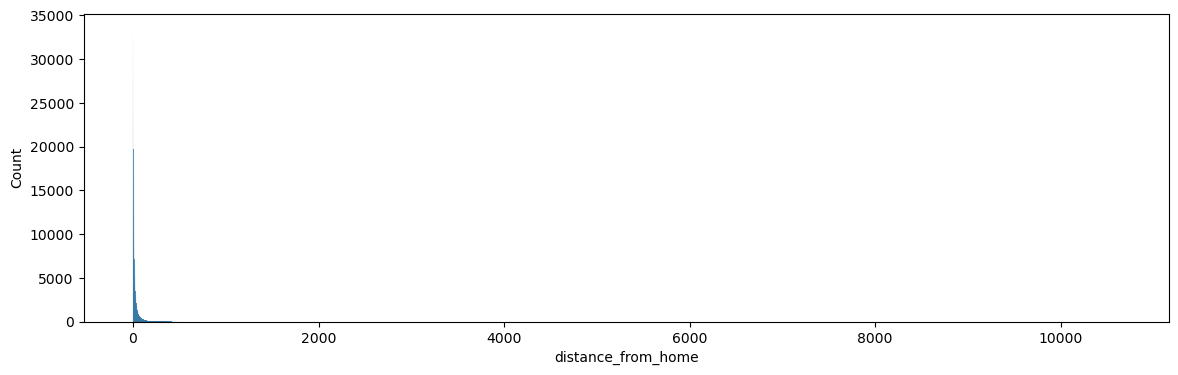

In [62]:
fig, ax = plt.subplots(figsize = (14, 4))
sns.histplot(x=df['distance_from_home'])

In [58]:
fig, ax = plt.subplots(figsize = (14, 4))
sns.histplot(data = df, x=df['distance_from_home'], hue='fraud')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
# sns.countplot(y = df['used_chip'], x = df['fraud'], ax = ax)
ax.set_title('Distribution of Tenure by fraud', fontname='Times New Roman', fontsize=12, fontweight='bold')
sns.despine()

Error in callback <function flush_figures at 0x000002BFC8365F80> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [22]:
df.groupby(['fraud'])['used_chip'].describe()

,count,mean,std,min,25%,50%,75%,max
fraud,,,,,,,,
0.0,912597.0,0.359402,0.479825,0.0,0.0,0.0,1.0,1.0
1.0,87403.0,0.256399,0.436647,0.0,0.0,0.0,1.0,1.0


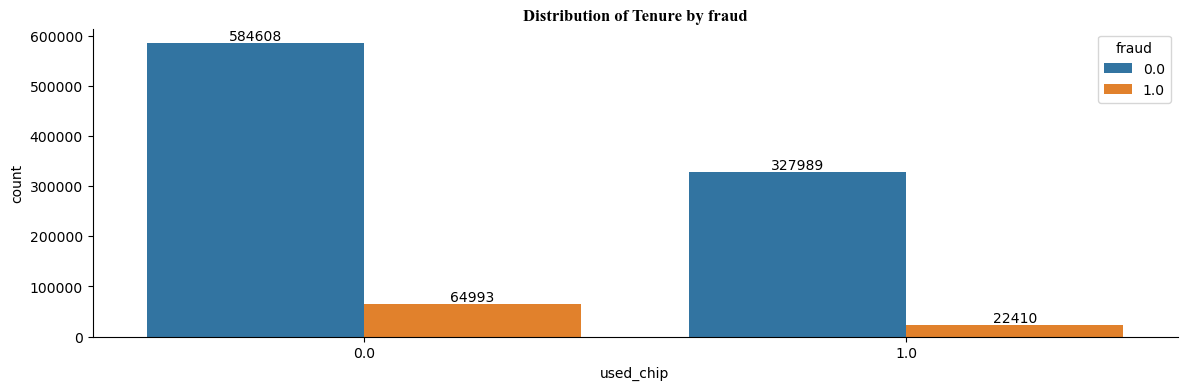

In [44]:
fig, ax = plt.subplots(figsize = (14, 4))
sns.countplot(data = df, x=df['used_chip'], hue='fraud')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
# sns.countplot(y = df['used_chip'], x = df['fraud'], ax = ax)
ax.set_title('Distribution of Tenure by fraud', fontname='Times New Roman', fontsize=12, fontweight='bold')
sns.despine()

In [50]:
target = "fraud"
cat_column = ["used_chip"]
for col in cat_column:
    print(f'Value counts of {target} in {col}:')
    print(df.groupby(col)[target].value_counts())
    print('\n')
    for c in df[col].unique():
        print(f'Survived {c}: {100*(len(df[(df[col]==c) & (df[target]==1)]))/(len(df[df[col]==c]))}%')
        print('\n')

Value counts of fraud in used_chip:
used_chip  fraud
0.0        0.0      584608
           1.0       64993
1.0        0.0      327989
           1.0       22410
Name: count, dtype: int64


Survived 1.0: 6.395566197392116%


Survived 0.0: 10.005064647375852%




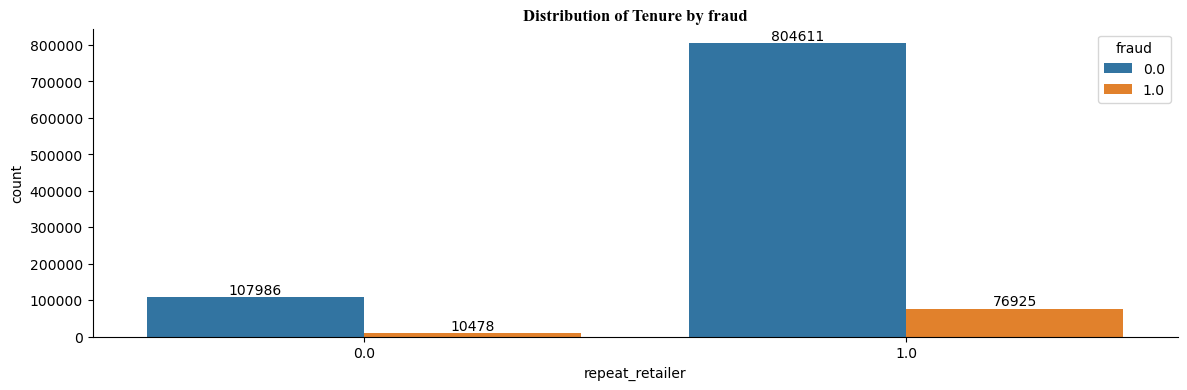

In [52]:
fig, ax = plt.subplots(figsize = (14, 4))
sns.countplot(data = df, x=df['repeat_retailer'], hue='fraud')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
# sns.countplot(y = df['used_chip'], x = df['fraud'], ax = ax)
ax.set_title('Distribution of Tenure by fraud', fontname='Times New Roman', fontsize=12, fontweight='bold')
sns.despine()

In [54]:
target = "fraud"
cat_column = ["repeat_retailer"]
for col in cat_column:
    print(f'Value counts of {target} in {col}:')
    print(df.groupby(col)[target].value_counts())
    print('\n')
    for c in df[col].unique():
        print(f'Survived {c}: {100*(len(df[(df[col]==c) & (df[target]==1)]))/(len(df[df[col]==c]))}%')
        print('\n')

Value counts of fraud in repeat_retailer:
repeat_retailer  fraud
0.0              0.0      107986
                 1.0       10478
1.0              0.0      804611
                 1.0       76925
Name: count, dtype: int64


Survived 1.0: 8.726246006969653%


Survived 0.0: 8.84488114532685%




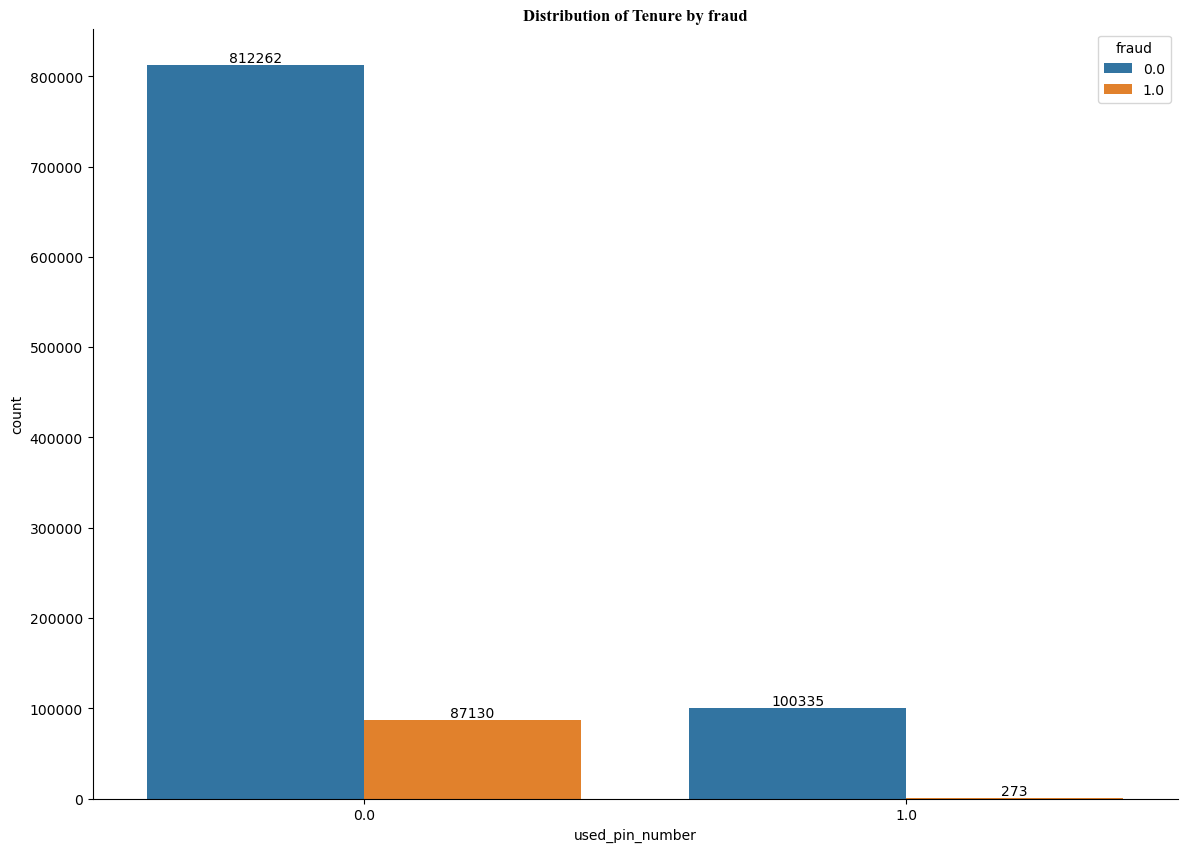

In [30]:
fig, ax = plt.subplots(figsize = (14, 10))
sns.countplot(data = df, x=df['used_pin_number'], hue='fraud')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
# sns.countplot(y = df['used_chip'], x = df['fraud'], ax = ax)
ax.set_title('Distribution of Tenure by fraud', fontname='Times New Roman', fontsize=12, fontweight='bold')
sns.despine()

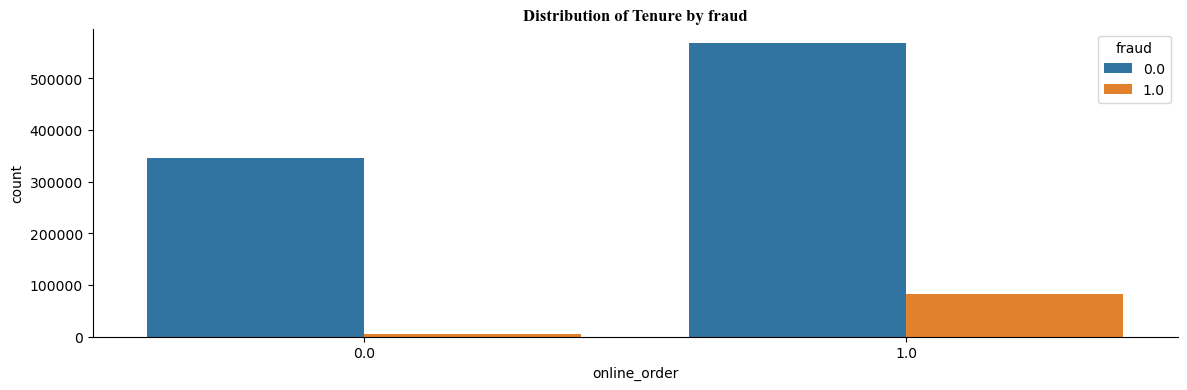

In [30]:
fig, ax = plt.subplots(figsize = (14, 4))
sns.countplot(data = df, x=df['online_order'], hue='fraud')
# sns.countplot(y = df['used_chip'], x = df['fraud'], ax = ax)
ax.set_title('Distribution of Tenure by fraud', fontname='Times New Roman', fontsize=12, fontweight='bold')
sns.despine()

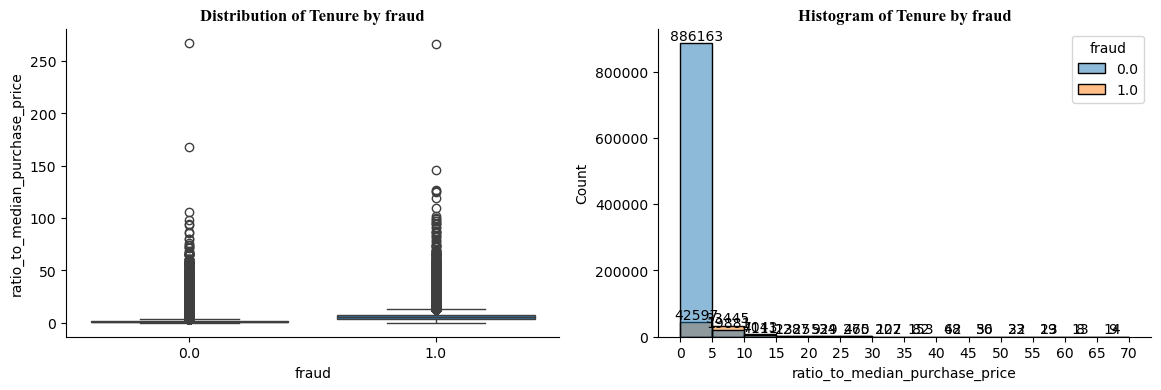

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
sns.histplot(x = df['ratio_to_median_purchase_price'], hue = df['fraud'], bins = np.arange(0, 75, 5), ax = ax[1])
sns.boxplot(y = df['ratio_to_median_purchase_price'], x = df['fraud'], ax = ax[0])
ax[1].bar_label(ax[1].containers[0])
ax[1].bar_label(ax[1].containers[1])
ax[1].set_xticks(np.arange(0, 75, 5))
ax[0].set_title('Distribution of Tenure by fraud', fontname='Times New Roman', fontsize=12, fontweight='bold')
ax[1].set_title('Histogram of Tenure by fraud', fontname='Times New Roman', fontsize=12, fontweight='bold')
sns.despine()

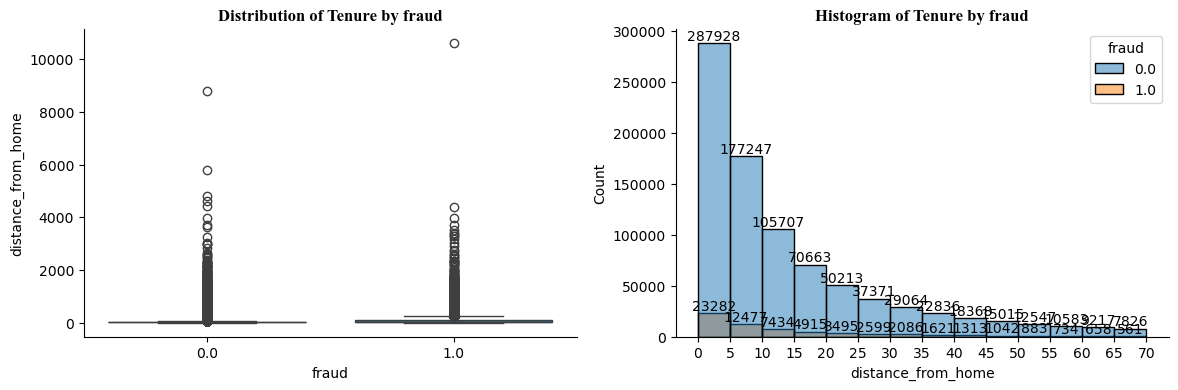

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
sns.histplot(x = df['distance_from_home'], hue = df['fraud'], bins = np.arange(0, 75, 5), ax = ax[1])
sns.boxplot(y = df['distance_from_home'], x = df['fraud'], ax = ax[0])
ax[1].bar_label(ax[1].containers[0])
ax[1].bar_label(ax[1].containers[1])
ax[1].set_xticks(np.arange(0, 75, 5))
ax[0].set_title('Distribution of Tenure by fraud', fontname='Times New Roman', fontsize=12, fontweight='bold')
ax[1].set_title('Histogram of Tenure by fraud', fontname='Times New Roman', fontsize=12, fontweight='bold')
sns.despine()

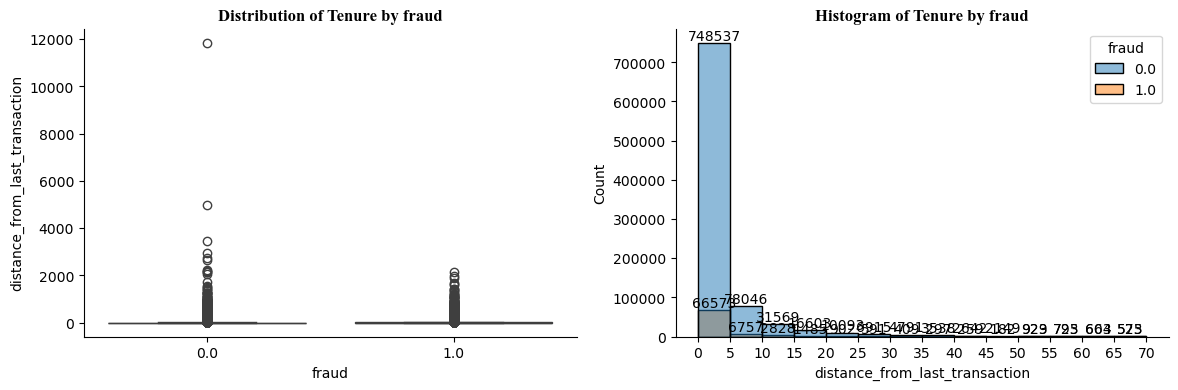

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
sns.histplot(x = df['distance_from_last_transaction'], hue = df['fraud'], bins = np.arange(0, 75, 5), ax = ax[1])
sns.boxplot(y = df['distance_from_last_transaction'], x = df['fraud'], ax = ax[0])
ax[1].bar_label(ax[1].containers[0])
ax[1].bar_label(ax[1].containers[1])
ax[1].set_xticks(np.arange(0, 75, 5))
ax[0].set_title('Distribution of Tenure by fraud', fontname='Times New Roman', fontsize=12, fontweight='bold')
ax[1].set_title('Histogram of Tenure by fraud', fontname='Times New Roman', fontsize=12, fontweight='bold')
sns.despine()

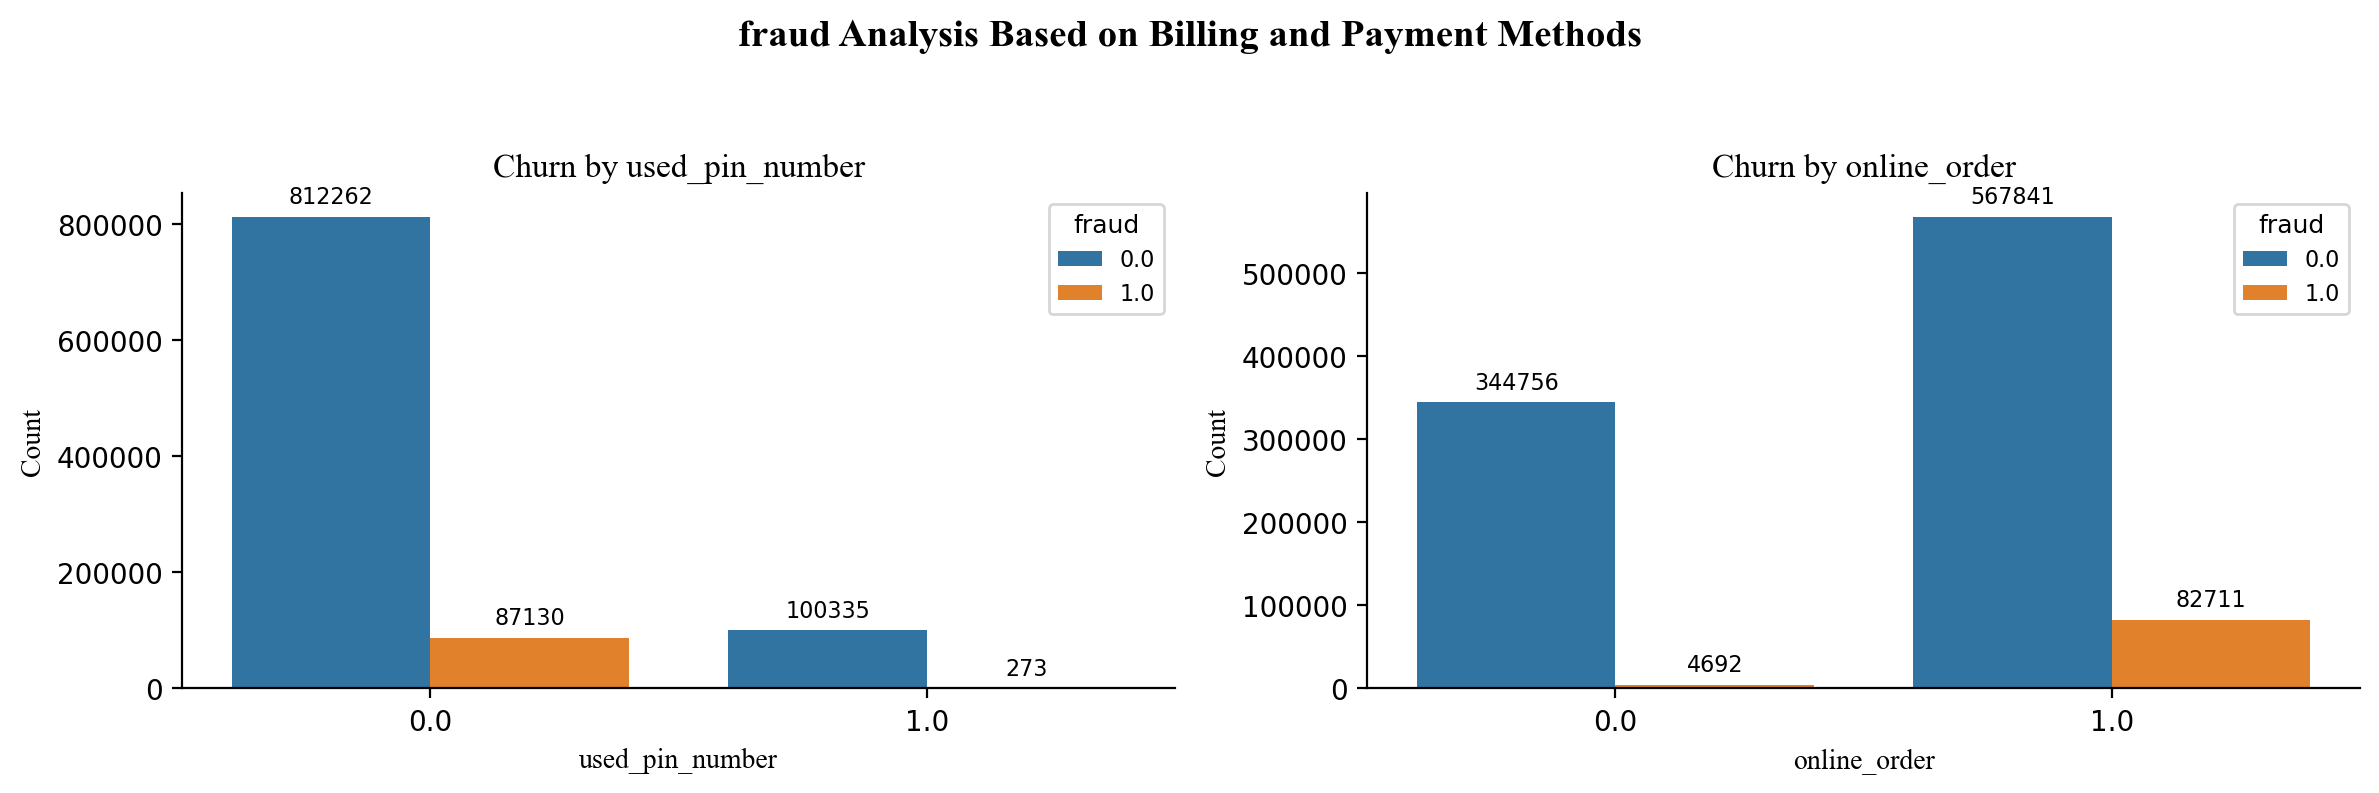

In [22]:
paying_options = df[['fraud', 'used_pin_number', 'online_order']]
cols = paying_options.columns[1:]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=200)

plt.suptitle('fraud Analysis Based on Billing and Payment Methods', 
             fontname='Times New Roman', fontsize=14, fontweight='bold')

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=paying_options, x=cols[i], hue='fraud', ax=ax)

        ax.set_title(f'Churn by {cols[i].replace("PaperlessBilling", "Paperless Billing")}', 
                     fontname='Times New Roman', fontsize=12)
        ax.set_xlabel(cols[i].replace("PaperlessBilling", "Paperless Billing"), 
                      fontname='Times New Roman', fontsize=10)
        ax.set_ylabel('Count', 
                      fontname='Times New Roman', fontsize=10)
        ax.legend(title='fraud', title_fontsize=9, fontsize=8, loc='best')

        for container in ax.containers:
            ax.bar_label(container, fontsize=8, padding=3, color='black')

sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.93])

### 2 |EDA: Diagnostics Analytics with Data Visualization

In [9]:
numerical = []
categorical = []
excluded_columns  = []
target = 'fraud'
for column in df.columns:
    if column == target:
        continue
    elif column in excluded_columns:
        continue
    elif df[column].nunique() == 2:
        categorical.append(column)
    else:
        numerical.append(column)

In [80]:
categorical

['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

In [82]:
numerical

['distance_from_home',
 'distance_from_last_transaction',
 'ratio_to_median_purchase_price']

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [13]:
numerical_transformer = Pipeline([
    ('imput', SimpleImputer(strategy='median')), ## mean , median: Number, 
    ('scaling', StandardScaler())
])
categorical_transformer = Pipeline([
    ('inmute', SimpleImputer(strategy='most_frequent')), ## Categorical 
     ('encoding', OrdinalEncoder())
])
preprocessor = ColumnTransformer([
    ('numerical', numerical_transformer, numerical),
    ('categorical', categorical_transformer, categorical)
])  ### 

In [15]:
pipeline = Pipeline([
    # ('drop', FunctionTransformer(drop_columns, validate=False)),
    ('prepro', preprocessor)
])

In [17]:
import joblib 

In [19]:
joblib.dump(pipeline, 'credit_card_fraud.pkl')

['credit_card_fraud.pkl']

In [21]:
x = df.drop(columns=[target]+excluded_columns)
y = df[target]
X_transformed = pipeline.fit_transform(x)

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
input_shape = X_train.shape[1]

In [27]:
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
import tensorflow as tf

In [28]:
  # Determine input shape dynamically
model = tf.keras.Sequential([
    InputLayer(input_shape=(input_shape,)),
    Dense(512, activation="relu"), ## Hidden Layer : 64 unit
    Dense(256, activation="relu"), 
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(8, activation="relu"),
    Dense(2, activation='sigmoid') ### 
])

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 303s 12ms/step - accuracy: 0.9898 - loss: 0.0267 - val_accuracy: 0.9926 - val_loss: 0.0189
Epoch 2/2
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 286s 11ms/step - accuracy: 0.9965 - loss: 0.0091 - val_accuracy: 0.9975 - val_loss: 0.0062


In [32]:
model.save("credit_card_fraud.h5")

### 2.1 Gender, Seniority, Partner and Dependends(Customer)

### 2.2 Services

### 2.3 Security Support

### 2.4 Contract Type

### 2.5 Churn analysis based on paying options

### 2.6 Churn analysis based on tenure group

### 2.7 Charges

### 3 |Data preprocessing and Feature engineering